# K-means Clustering Practice

### 준비하기: 라이브러리 설치 및 불러오기

In [63]:
# --- 라이브러리 설치 ---
import subprocess
import sys

def install_if_not_exists(package):
    try:
        __import__(package)
    except ImportError:
        subprocess.check_call([sys.executable, "-m", "pip", "install", package])

install_if_not_exists("numpy")
install_if_not_exists("matplotlib")
install_if_not_exists("sklearn")
install_if_not_exists("pandas")


# --- 라이브러리 불러오기 ---
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs, make_circles

# 문서 전체의 재현성을 위해 랜덤 시드를 고정합니다.
np.random.seed(0)

---
## Part 1: K-means 기본 원리
---

### 1.1. 기본 원리 학습용 데이터 생성 및 시각화
K-means 알고리즘을 시각적으로 이해하기 위해, `make_blobs` 함수를 사용하여 명확하게 구분된 데이터 군집을 생성하고 시각화합니다.

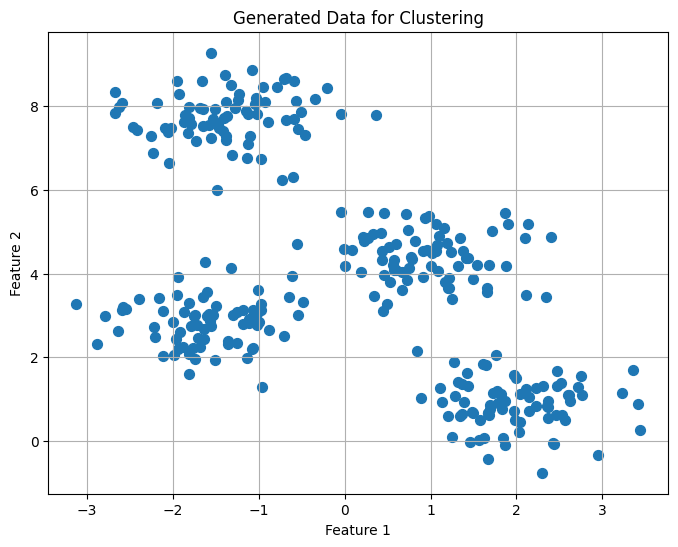

In [64]:
# 실습: n_samples, centers, cluster_std 값을 바꿔보며 데이터 분포가 어떻게 변하는지 확인해보세요.
X, y_true = make_blobs(n_samples=300, centers=4,
                       cluster_std=0.60, random_state=0)

plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], s=50)
plt.title("Generated Data for Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.grid()
plt.show()

### 1.2. K-means 모델 학습 및 결과 시각화
`sklearn.cluster.KMeans`를 사용하여 모델을 학습하고, 군집화 결과를 시각화합니다.
K-means는 각 데이터 포인트를 가장 가까운 군집 중심에 할당하는 방식으로 동작하며, 결과적으로 데이터가 4개의 그룹으로 잘 나뉘는 것을 볼 수 있습니다.

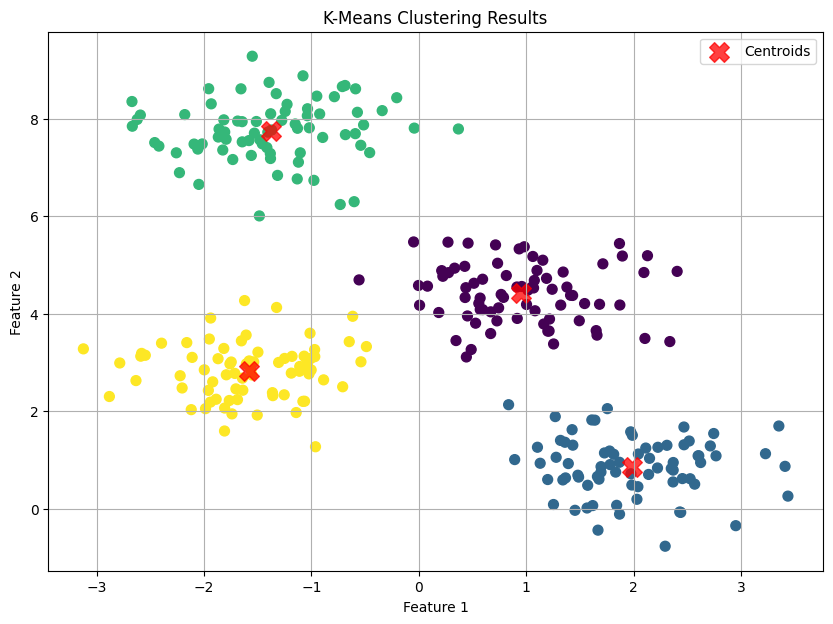

In [65]:
# 실습: n_clusters 값을 실제 클러스터 개수인 4가 아닌 다른 값(예: 3, 5)으로 바꿔보세요.
#       결과가 어떻게 달라지는지 관찰하고, K값 설정의 중요성에 대해 생각해보세요.
kmeans = KMeans(n_clusters=4, init='k-means++', n_init=10, random_state=0)
y_kmeans = kmeans.fit_predict(X)

plt.figure(figsize=(10, 7))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='red', s=200, alpha=0.75, marker='X', label='Centroids')
plt.title("K-Means Clustering Results")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid()
plt.show()

---
## Part 2: K-means 적용 사례 (MNIST)
---

### 2.1. MNIST 데이터에 K-means 적용 및 중심 시각화
실제 데이터인 MNIST 손글씨 숫자 데이터셋에 K-means를 적용합니다. 784차원의 픽셀 데이터를 10개의 클러스터(0~9 숫자)로 그룹화하고, 학습된 각 클러스터의 중심(Centroid)을 시각화합니다.
이는 각 클러스터를 대표하는 '평균적인' 숫자 이미지를 보여줍니다.

**중요**: K-means는 비지도 학습이므로, 클러스터의 레이블(예: 'Cluster 0')이 실제 숫자의 레이블(예: '0')과 일치하지는 않습니다.

데이터 크기: (70000, 784)
Initialization complete
Iteration 0, inertia 4572952.269357938.
Iteration 1, inertia 2913453.555870522.
Iteration 2, inertia 2847380.866254315.
Iteration 3, inertia 2819924.985651255.
Iteration 4, inertia 2803563.992322351.
Iteration 5, inertia 2790858.646935739.
Iteration 6, inertia 2782215.3416035543.
Iteration 7, inertia 2776345.233743611.
Iteration 8, inertia 2772042.521831671.
Iteration 9, inertia 2768627.1045753146.
Iteration 10, inertia 2765852.0085039646.
Iteration 11, inertia 2763498.143401716.
Iteration 12, inertia 2761509.1531883166.
Iteration 13, inertia 2759777.060024321.
Iteration 14, inertia 2758316.835477006.
Iteration 15, inertia 2757074.4350083712.
Iteration 16, inertia 2755987.6149655012.
Iteration 17, inertia 2755133.9591106.
Iteration 18, inertia 2754495.865547881.
Iteration 19, inertia 2753966.0644222773.
Iteration 20, inertia 2753514.941391723.
Iteration 21, inertia 2753041.19472212.
Iteration 22, inertia 2752552.31005392.
Iteration 23, inert

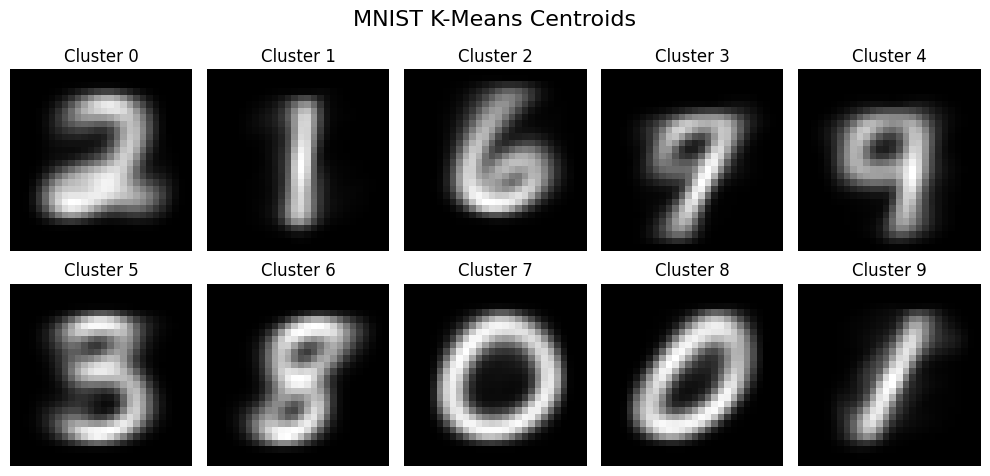

In [66]:
with np.load('mnist.npz') as data:
    X_mnist = data['X']
    y_mnist = data['y']

print(f"데이터 크기: {X_mnist.shape}")

# n_init=1: 1번의 초기값으로 실행합니다.
# verbose=1: 학습 진행 상황을 출력하여 실시간으로 확인합니다.
mnist_kmeans = KMeans(n_clusters=10, init='k-means++', n_init=1, random_state=0, verbose=1)
mnist_kmeans.fit(X_mnist)

# 클러스터 중심(Centroid) 시각화
centroids_mnist = mnist_kmeans.cluster_centers_

fig, ax = plt.subplots(2, 5, figsize=(10, 5))
for i, centroid in enumerate(centroids_mnist):
    img = centroid.reshape(28, 28)
    row = i // 5
    col = i % 5
    ax[row, col].imshow(img, cmap='gray')
    ax[row, col].set_title(f'Cluster {i}')
    ax[row, col].axis('off')

plt.suptitle("MNIST K-Means Centroids", fontsize=16)
plt.tight_layout()
plt.show()

---
## Part 3: K-means의 한계와 피처 변환
---
K-means는 군집이 구형(spherical)이며, 중심점으로부터의 거리로 잘 구분될 것을 가정합니다.
이 가정이 깨지는 데이터에서는 잘 동작하지 않습니다. 이 한계를 확인하고, 피처 변환을 통해 해결해봅니다.

### 3.1. 실패 사례: 동심원 데이터에 K-means 적용
`make_circles`로 생성된 동심원 데이터에 K-means를 적용하면, 거리 기반 군집화의 한계로 인해 올바르게 분류하지 못합니다.

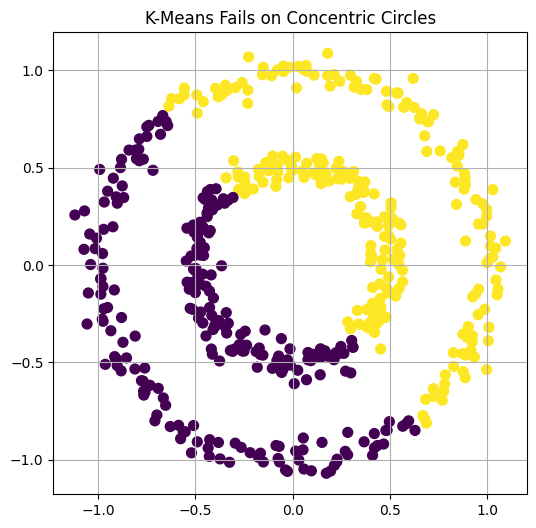

In [67]:
# 동심원 데이터 생성
# 실습: n_samples, centers, cluster_std 값을 바꿔보며 데이터 분포가 어떻게 변하는지 확인해보세요.
X_circles, y_circles = make_circles(n_samples=500, factor=0.5, noise=0.05, random_state=0)

# 1. 원본 데이터에 K-means 적용 (실패 사례)
kmeans_fail = KMeans(n_clusters=2, init='k-means++', n_init=1, random_state=0)
y_kmeans_fail = kmeans_fail.fit_predict(X_circles)

plt.figure(figsize=(8, 6))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_kmeans_fail, s=50, cmap='viridis')
plt.title('K-Means Fails on Concentric Circles')
# 가로, 세로 비율을 동일하게 설정하여 원이 제대로 보이게 합니다.
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()

### 3.2. 해결책: 피처 변환 및 K-means 재적용
데이터의 표현 방식을 바꾸어 K-means가 인식할 수 있는 형태로 만들어줍니다. 기존의 (x, y) 직교 좌표계를 **거리(r)**와 **각도(θ)**를 나타내는 **극 좌표계**로 변환합니다.
변환된 좌표계에서는 거리(r) 값만으로도 두 군집이 명확하게 구분되어, K-means가 성공적으로 동작합니다.

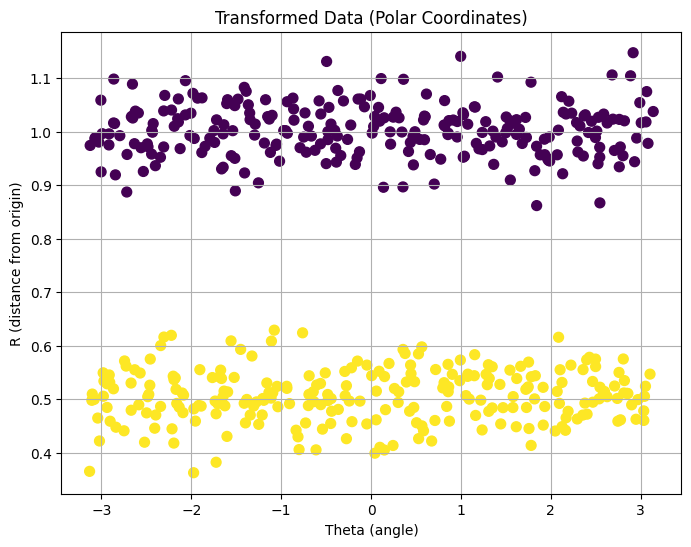

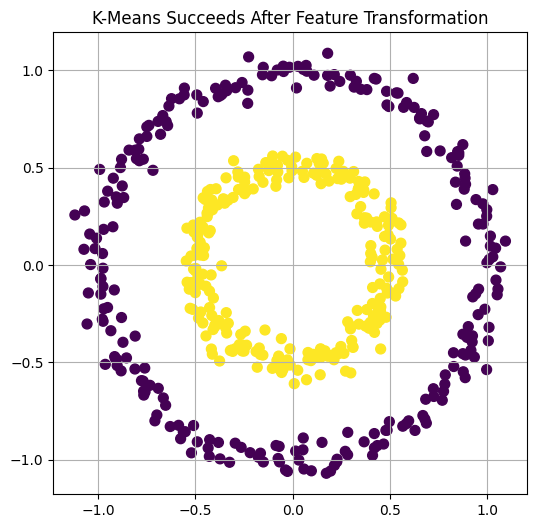

In [68]:
# 2. 피처 변환: 직교 좌표계 -> 극 좌표계
r = np.sqrt(X_circles[:, 0] ** 2 + X_circles[:, 1] ** 2)
theta = np.arctan2(X_circles[:, 1], X_circles[:, 0])

# 변환된 데이터를 시각화하여 구조를 확인합니다.
plt.figure(figsize=(8, 6))
plt.scatter(theta, r, c=y_circles, s=50, cmap='viridis')
plt.title('Transformed Data (Polar Coordinates)')
plt.xlabel('Theta (angle)')
plt.ylabel('R (distance from origin)')
plt.grid()
plt.show()

# 3. 변환된 데이터(거리 r)에 K-means 적용 (성공 사례)
# r.reshape(-1, 1)는 1차원 배열 r을 2차원 열 벡터로 변환합니다.
kmeans_success = KMeans(n_clusters=2, init='k-means++', n_init=1, random_state=0)
y_kmeans_success = kmeans_success.fit_predict(r.reshape(-1, 1))

# 피처 변환 후 K-means가 성공적으로 분류한 결과를 원본 데이터에 시각화합니다.
plt.figure(figsize=(8, 6))
plt.scatter(X_circles[:, 0], X_circles[:, 1], c=y_kmeans_success, s=50, cmap='viridis')
plt.title('K-Means Succeeds After Feature Transformation')
# 가로, 세로 비율을 동일하게 설정하여 원이 제대로 보이게 합니다.
plt.gca().set_aspect('equal', adjustable='box')
plt.grid()
plt.show()